In [1]:
from models import Unet
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import pytorch_lightning as pl
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import cv2
import glob
import numpy as np
import pandas as pd
from PIL import Image

/home/kudrjavtseviv/DL-framework/.venv-hwr-train-2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Unet_eval_data():
    def __init__(self, checkpoint_path, name, features, map_location=torch.device('cpu'), image_height=800, image_width=600):
        self.checkpoint_path = checkpoint_path
        self.map_location = map_location
        self.features = features
        self.name = name
        self.image_height = image_height
        self.image_width = image_width

    def setup(self):
        self.model = Unet.load_from_checkpoint(self.checkpoint_path, map_location=self.map_location, features=self.features)
        self.model.eval()

    def get_model(self):
        return self.model

def get_filenames(path, regexp='*', extensions=None, recursive=True):
    if recursive:
        path += '**/'
    path += regexp

    files_grabbed = []
    for extension in extensions:
        files_grabbed.extend(glob.glob(path + '.' + extension, recursive=recursive))

    return files_grabbed

def load_image(file_path):
    return cv2.imread(file_path)


class EvalImageDataset(Dataset):
    def __init__(self, path, info_filename, name, info_image_column='image'):
        self.path = path
        self.info_filename = info_filename
        self.info_image_column = info_image_column
        self.name=name
        
        self.meta = pd.read_csv(info_filename, sep='\t')

        self.transform_for_model = A.Compose(
            [
                A.Resize(height=800, width=600),
                A.Normalize(
                    mean=[0.0],
                    std=[1.0],
                    max_pixel_value=255.0
                ),
                ToTensorV2()
            ]
        )

        self.transform_for_output = A.Compose(
            [
                A.Resize(height=800, width=600),
                ToTensorV2()
            ]
        )

    def __len__(self):
        return len(self.meta)

    def __getitem__(self, index):
        item = self.meta.iloc[index]
        image = load_image(os.path.join(self.path, item[self.info_image_column]))

        image_for_model = self.transform_for_model(image=image[:, :, 0:1])['image']
        image = self.transform_for_output(image=image)['image']

        return image_for_model, image


In [52]:
IMAGE_HEIGHT = 800
IMAGE_WIDTH = 600

models_data = [
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_92/Unet-128_16-800_600-dice_loss/epoch05-val_loss0.13.ckpt',
        name='Unet-128_16-800_600-dice_loss_92',
        features=[16, 32, 64, 128]
    ),
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_100/Unet-256_32-800_600-dice_loss/epoch09-val_loss0.08.ckpt',
        name='Unet-256_32-800_600-dice_loss_100',
        features=[32, 64, 128, 256]
    ),
    
    # 123 version
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_123/Unet-512_64-800_600-dice_loss/epoch24-val_loss0.06.ckpt',
        name='Unet-512_64-800_600-dice_loss_123_24',
        features=[64, 128, 256, 512]
    ),
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_123/Unet-512_64-800_600-dice_loss/epoch12-val_loss0.06.ckpt',
        name='Unet-512_64-800_600-dice_loss_123_12',
        features=[64, 128, 256, 512]
    ),
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_123/Unet-512_64-800_600-dice_loss/epoch20-val_loss0.06.ckpt',
        name='Unet-512_64-800_600-dice_loss_123_20',
        features=[64, 128, 256, 512]
    ),

    # 124 version
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_124/Unet-256_32-800_600-dice_loss/epoch23-val_loss0.07.ckpt',
        name='Unet-256_32-800_600-dice_loss_124_23',
        features=[32, 64, 128, 256]
    ),
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_124/Unet-256_32-800_600-dice_loss/epoch19-val_loss0.07.ckpt',
        name='Unet-256_32-800_600-dice_loss_124_19',
        features=[32, 64, 128, 256]
    ),
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_124/Unet-256_32-800_600-dice_loss/epoch10-val_loss0.07.ckpt',
        name='Unet-256_32-800_600-dice_loss_124_10',
        features=[32, 64, 128, 256]
    ),

    # 128 version
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_128/Unet-128_16-800_600-dice_loss/epoch21-val_loss0.08.ckpt',
        name='Unet-128_16-800_600-dice_loss_128_21',
        features=[16, 32, 64, 128]
    ),
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_128/Unet-128_16-800_600-dice_loss/epoch18-val_loss0.08.ckpt',
        name='Unet-128_16-800_600-dice_loss_128_18',
        features=[16, 32, 64, 128]
    ),
    Unet_eval_data(
        checkpoint_path='/home/kudrjavtseviv/DL-framework/.data/logs/lightning_logs/version_128/Unet-128_16-800_600-dice_loss/epoch13-val_loss0.08.ckpt',
        name='Unet-128_16-800_600-dice_loss_128_13',
        features=[16, 32, 64, 128]
    ),
]

In [6]:
def _pad(preds, pad=(2, 0)):
    preds = torch.sigmoid(preds)
    preds = (preds > 0.5).float()

    def padding(x):
        p3d = (0, 0, 0, 0) + pad # pad by (0, 0), (0, 0), and (0, 1)
        return F.pad(x, p3d, "constant", 0.0)
    
    return padding(preds)

def process_batch(i, batch_input, batch_image, model):
    batch_preds = model(batch_input).detach()
    masks_1 = torch.sigmoid(batch_preds)
    # masks_1 = (masks_1 > 0.1).float()
    masks_3 = _pad(masks_1)

    for image, mask_3, mask_1 in zip(batch_image, masks_3, masks_1):
        image = np.moveaxis(image.numpy(), 0, -1)
        mask_3 = np.moveaxis(mask_3.numpy(), 0, -1)
        mask_1 = mask_1[0].numpy()

        yield image, (mask_3 * 255).astype(np.uint8), (mask_1 * 255).astype(np.uint8), i + 1

def process_one_image(path, model):
    transform_for_model = A.Compose(
        [
            A.Resize(height=800, width=600),
            A.Normalize(
                mean=[0.0],
                std=[1.0],
                max_pixel_value=255.0
            ),
            ToTensorV2()
        ]
    )

    transform_for_output = A.Compose(
        [
            A.Resize(height=800, width=600),
            ToTensorV2()
        ]
    )

    img = cv2.imread(path)


    to_model = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    to_model = transform_for_model(image=to_model)['image']

    # return to_model
    to_model = to_model[None, :, :, :]
    
    to_output = transform_for_output(image=img)['image']
    to_output = to_output[None, :, :, :]

    # print(to_model.shape)
    # print(to_output.shape)

    return process_batch(0, to_model, to_output, model=model)


## Тест

In [7]:
model = models_data[0]
model.setup()
model = model.get_model()

In [9]:
to_model = next(process_one_image(path='/home/kudrjavtseviv/DL-framework/.temp/IMG_20230522_0001-1.png', model=model))
# to_model[0].numpy().shape

In [10]:
Image.fromarray(cv2.cvtColor(to_model, cv2.COLOR_GRAY2RGB))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'


In [12]:
Image.fromarray(cv2.cvtColor((to_model[0].numpy() * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB))

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


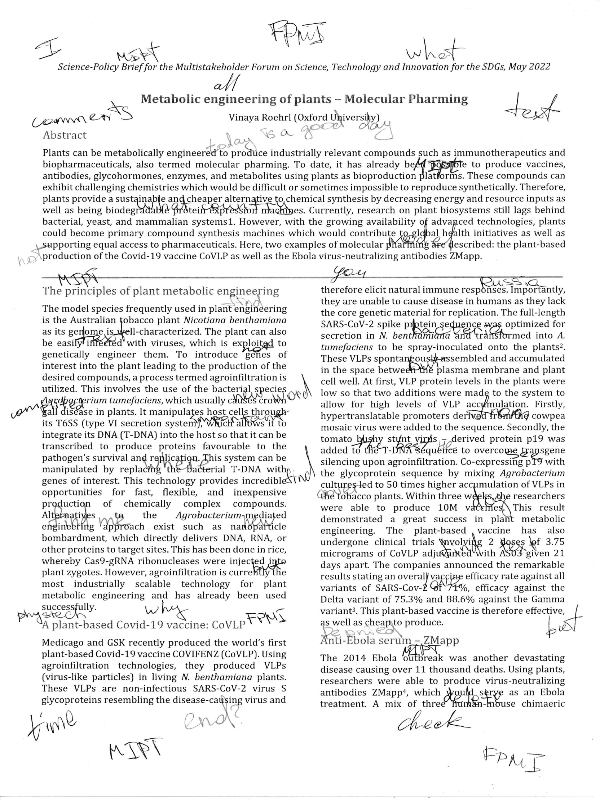

In [17]:
Image.fromarray(cv2.cvtColor(to_model[0], cv2.COLOR_BGR2RGB))

## Проверка одного изображения

In [7]:
def get_result_images(image, mask_3, mask_1):
    # print(image.shape)

    image_output = cv2.addWeighted(image, 1.0, mask_3, 0.4, 0)

    # cv2.erode(mask_1, np.ones((1, 1), np.uint8), mask_1)

    mask_inv = cv2.bitwise_not(mask_1)

    # вырезка области изображения по маске
    img_bg = cv2.bitwise_and(image, image, mask=mask_inv)

    # вырезка области маски по маске
    img_fg = cv2.bitwise_and(image, image, mask=mask_1)
    img_fg[img_fg > 0] = 255
    # cv2.erode(img_fg, np.ones((2, 2), np.uint8), img_fg)
    # cv2.dilate(img_bg, np.ones((2, 2), np.uint8), img_bg)

    # создание заплатки, закрасив вырезанную область цветом
    patch = cv2.add(img_bg, img_fg)
    return patch, image, image_output

def save_result_images(patch, image, image_output, name, output_path):
    cv2.imwrite(os.path.join(output_path, f'{name}_input.png'), image)
    cv2.imwrite(os.path.join(output_path, f'{name}_output.png'), image_output)
    cv2.imwrite(os.path.join(output_path, f'{name}_patch.png'), patch)

In [8]:
model = models_data[0]
model.setup()
model = model.get_model()

In [9]:
image, mask_3, mask_1, _ = next(process_one_image(path='/home/kudrjavtseviv/DL-framework/.temp/IMG_3940.JPG', model=model))
patch, image, image_output = get_result_images(image, mask_3, mask_1)

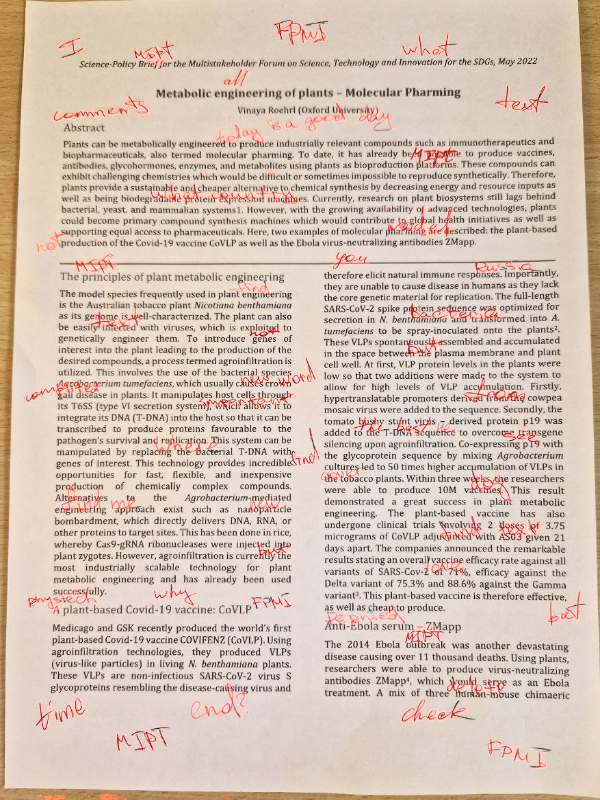

In [10]:
Image.fromarray(cv2.cvtColor(image_output, cv2.COLOR_BGR2RGB))

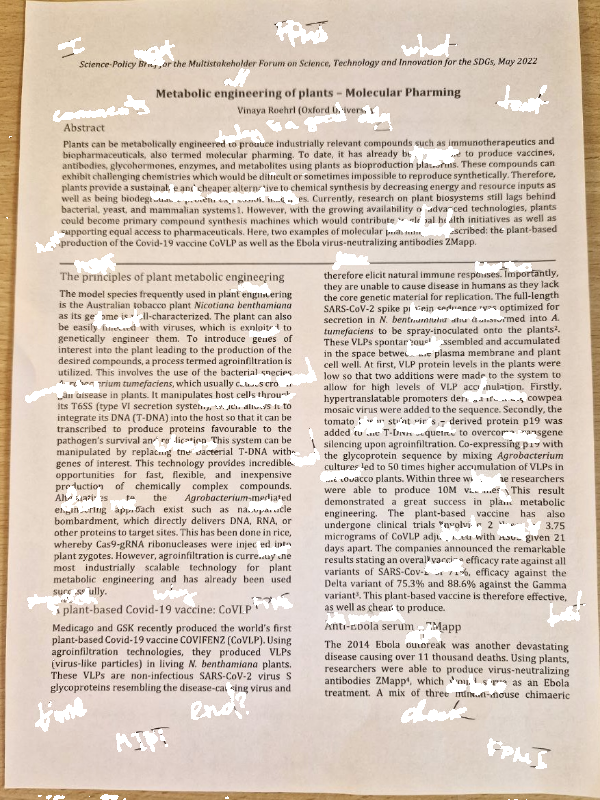

In [11]:
Image.fromarray(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))

## Проверка папки

In [53]:
input_path = '/home/kudrjavtseviv/DL-framework/.temp/input/test_2'
output_path = '/home/kudrjavtseviv/DL-framework/.output'
dataset_name = 'test_images_2'


paths = get_filenames(path=input_path, regexp='*', extensions=['JPG', 'jpg', 'PNG', 'png'], recursive=True)

In [54]:
paths

['/home/kudrjavtseviv/DL-framework/.temp/input/test_2/IMG_3938.JPG',
 '/home/kudrjavtseviv/DL-framework/.temp/input/test_2/photo_2023-05-22_22-24-50.jpg']

In [55]:
for model_data in models_data:
    model_data.setup()
    model = model_data.get_model()

    output_data_model_path = os.path.join(output_path, model_data.name, dataset_name)
    os.makedirs(output_data_model_path, exist_ok=True)

    for image_path in tqdm(paths):
        image, mask_3, mask_1, _ = next(process_one_image(path=image_path, model=model))
        patch, image, image_output = get_result_images(image, mask_3, mask_1)
        save_result_images(patch, image, image_output, name=os.path.basename(image_path), output_path=output_data_model_path)

100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


## Проверка на тестовом датасете

In [22]:
output_path = '/home/kudrjavtseviv/DL-framework/.output'

dataset = EvalImageDataset(
    path='/home/kudrjavtseviv/data/dataset_1/test/result/',
    info_filename='/home/kudrjavtseviv/data/dataset_1/test/result/_info.csv',
    name='inferenceMixDl'
)

inferenceMixDl = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=False
)

dataloader = inferenceMixDl

model_data = models_data[0]
model_data.setup()
model = model_data.get_model()

In [20]:
def process_images(model):
    i = 0
    for batch in dataloader:
        batch_input, batch_image = batch
        for image, mask_3, mask_1, i in process_batch(i, batch_input, batch_image, model=model):
            yield image, mask_3, mask_1, i

In [26]:
output_data_model_path = os.path.join(output_path, model_data.name, dataset.name + '1')
os.makedirs(output_data_model_path, exist_ok=True)

for image, mask_3, mask_1, i in process_images(model=model):
    patch, image, image_output = get_result_images(image, mask_3, mask_1)

    path = os.path.join(output_path, model_data.name, dataset.name + '1')
    print(path)

    save_result_images(patch, image, image_output, i, path)
    # break

/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Unet-128_16-800_600-dice_loss/inferenceMixDl1
/home/kudrjavtseviv/DL-framework/.output/Un

KeyboardInterrupt: 

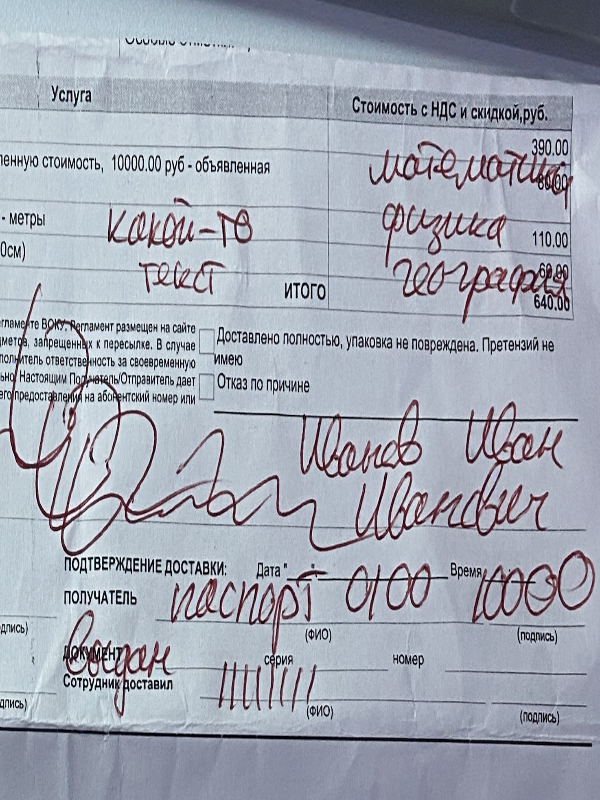

In [303]:
Image.fromarray(image_output)

## Проверка на тестовом датасете

In [ ]:
inferenceMixDl = DataLoader(
    dataset=EvalImageDataset(
        path='/home/kudrjavtseviv/data/dataset_1/test/result/',
        info_filename='/home/kudrjavtseviv/data/dataset_1/test/result/_info.csv'
    ),
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=False
)

dataloaders = [inferenceMixDl]

In [7]:
class Mark_and_save_callback(pl.Callback):
    def __init__(self, image_dir, pad=(2, 0)):
        self.image_dir = image_dir
        self.pad = pad
        os.makedirs(image_dir, exist_ok=True)
        self.state = {'image_dir': image_dir}
    
    def _pad(self, preds):
        preds = torch.sigmoid(preds)
        preds = (preds > 0.5).float()

        def padding(x):
            p3d = (0, 0, 0, 0) + self.pad # pad by (0, 0), (0, 0), and (0, 1)
            return F.pad(x, p3d, "constant", 0.0)
        
        return padding(preds)
        
    def on_predict_batch_end(self, trainer, pl_module, outputs, batch, batch_idx, dataloader_idx=0) -> None:
        dataloader_path = os.path.join(self.image_dir, f'dataloader_{dataloader_idx}') 
        os.makedirs(dataloader_path, exist_ok=True)

        for data, preds in zip(batch, outputs):
            preds = torch.sigmoid(preds)
            preds = (preds > 0.5).float()

            mask = self._pad(preds)
            background = cv2.cvtColor(data, cv2.COLOR_GRAY2BGR)

            image_output = cv2.addWeighted(background, 1.0, mask, 0.4, 0)
            cv2.imwrite(os.path.join(dataloader_path, f'output_{i}.png'), image_output)
            i += 1


In [16]:
output_path = '/home/kudrjavtseviv/DL-framework/.output'

for model_data in models_data:
    model_data.setup()
    model_name = model_data.name
    trainer = pl.Trainer(callbacks=[Mark_and_save_callback(
        image_dir=os.path.join(output_path, model_name)
    )])
    trainer.predict(model_data.get_model(), dataloaders=dataloaders[0])

/home/kudrjavtseviv/DL-framework/.venv-hwr-train-2/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kudrjavtseviv/DL-framework/.venv-hwr-train-2/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1823: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=8)`.
  rank_zero_warn(


Predicting DataLoader 0:   0%|          | 0/994 [00:00<?, ?it/s]

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 1, 3, 3], but got 3-dimensional input of size [1, 800, 600] instead